<a href="https://colab.research.google.com/github/pedromazim/visao/blob/main/visao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Explorando escalas de cinza, diferentes escalas de cores (RGB, HSI), e resolução de imagens

In [1]:
import skimage as skm
import numpy as np
import matplotlib.pyplot as pt

In [65]:
# caso o matplot de problema
from importlib import reload
pt = reload(pt)

In [2]:
from numba import jit

In [13]:
img = skm.io.imread('https://github.com/pedromazim/visao/blob/main/lantana_flower.jpg?raw=true')

(-0.5, 1199.5, 866.5, -0.5)

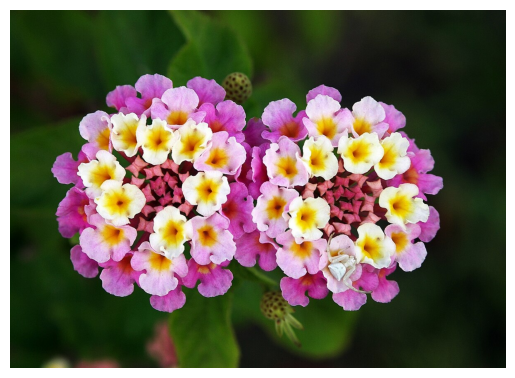

In [ ]:
pt.imshow(img)
pt.axis('off')

In [7]:
import matplotlib.colors as cm

In [86]:
@jit(nopython=True, looplift=True)
def make_gray(img, weights):

    '''
    converts an colored RGB image to grayscale

    img : image to be converted
    weights : list or array containing the relative weights of red, blue and green for conversion

    '''
    img_recol = np.zeros((img.shape[0],img.shape[1]))

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
                img_recol[i,j] = weights[0]*img[i,j,0] + weights[1]*img[i,j,1] + weights[2]*img[i,j,2]

    return img_recol

(-0.5, 1199.5, 866.5, -0.5)

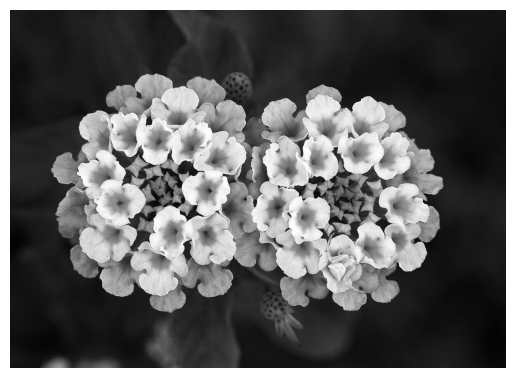

In [88]:
# using equal weights
pt.imshow(make_gray(img, [1/3,1/3,1/3]), cmap='gray', vmin=0, vmax=255)
pt.axis('off')

(-0.5, 1199.5, 866.5, -0.5)

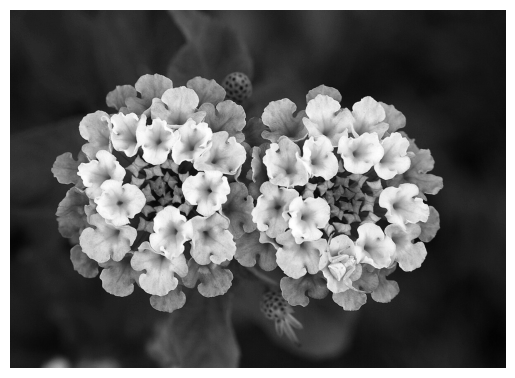

In [89]:
# using NTSC format weights
pt.imshow(make_gray(img, [0.299, 0.587, 0.114]), cmap='gray', vmin=0, vmax=255)
pt.axis('off')

In [90]:
@jit(nopython=False, looplift=True)
def grayscale(img, num_col):

    '''
    changes the number of gray shades from a gray image

    img : grayscale image
    num_col : number of color bounds in colormap, the number of gray shades is (num_cols-1)

    '''

    thd = np.linspace(0,255,num_col)
    img_recol = img.copy()

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for t in range(1,len(thd)-1):
                if img[i,j] <= thd[t] and img[i,j] > thd[t-1]:
                    img_recol[i,j] = thd[t-1]
                elif img[i,j] >= thd[t] and img[i,j] < thd[t+1]:
                    img_recol[i,j] = thd[t+1]

    return img_recol

<ipython-input-90-c34f934876e9>:1: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(nopython=False, looplift=True)


(-0.5, 1199.5, 866.5, -0.5)

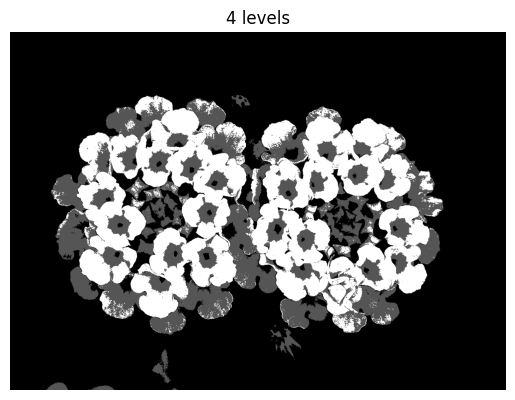

In [91]:
num_col = 4
pt.imshow(grayscale(make_gray(img, [1/3,1/3,1/3]), num_col), cmap='gray', vmin=0, vmax=255)
pt.title(f'{num_col} levels')
pt.axis('off')

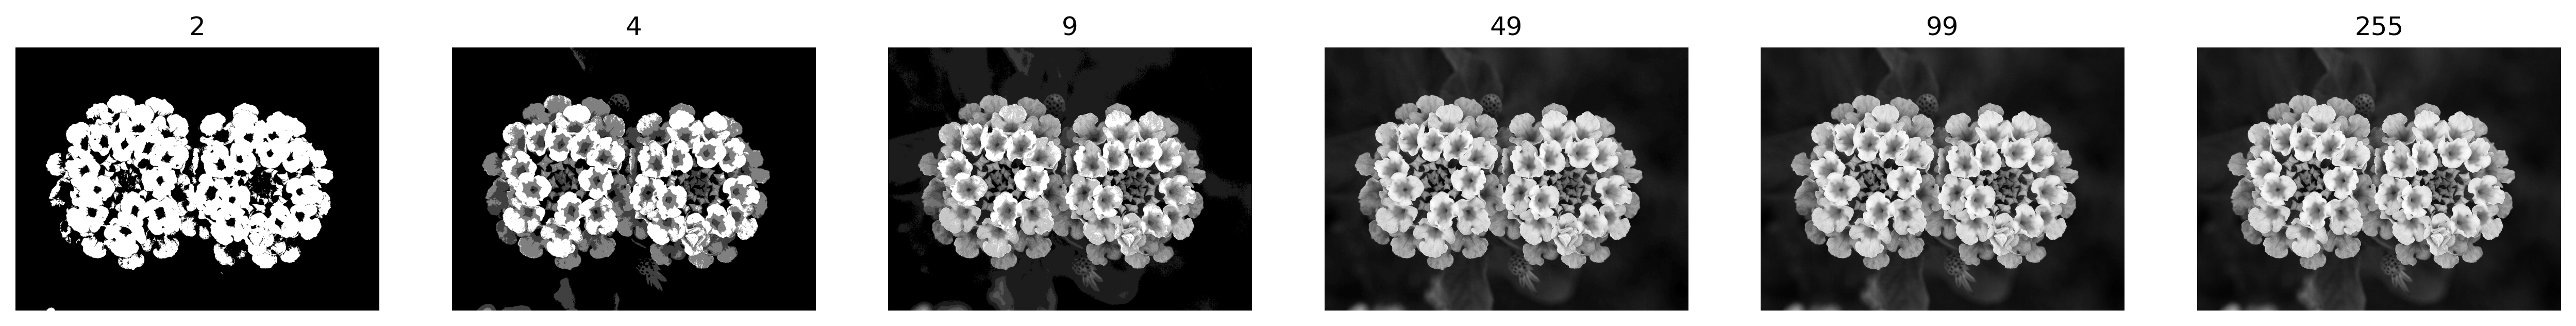

In [75]:
levels = [3, 5, 10, 50, 100, 256]

pt.figure(figsize=(len(levels)*3.54,3.54), dpi=300)
fig.tight_layout()
for l in range(len(levels)):
    pt.subplot(1,len(levels),l+1)
    pt.imshow(grayscale(make_gray(img, [1/3,1/3,1/3]), levels[l]), cmap='gray', vmin=0, vmax=255)
    pt.axis('off')
    pt.title(f'{levels[l]-1}')
pt.savefig('gray_levels.png', dpi=300)
pt.show()

In [ ]:
def colorscale(img, num_col, cmap):
    thd = np.linspace(0,1,num_col)
    img_recol = img.copy()

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for t in range(1,len(thd)-1):
                if img[i,j] <= thd[t]:
                    img_recol[i,j] = thd[t-1]
                else:
                    img_recol[i,j] = thd[t+1]

    pt.imshow(img_recol, cmap=f'{cmap}')
    pt.title(f'{num_col} levels')
    pt.axis('off')